In [4]:
import sys
sys.path.append('/home/meron/Documents/work/tenacademy/week1/eda')
import pandas as pd
from scripts.process_data import get_df
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.0f' % x)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [7]:
df = get_df()
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [12]:

non_numeric_columns = df.select_dtypes(exclude=['number']).columns

df_numeric = df.drop(non_numeric_columns, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())
cleaned_data.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Usage
0,13114483460844900352,770,662,1823652,208201448079117,33664962239,35521209507511,42,5,23,...,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636,345629377
1,13114483482878900224,235,606,1365104,208201909211140,33681854413,35794009006359,65,5,16,...,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965,707185356
2,13114483484080500736,1,652,1361762,208200314458056,33760627129,35281510359387,110,18,6,...,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335,307690973
3,13114483485442799616,486,171,1321509,208201402342131,33750343200,35356610164913,110,18,44,...,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530,889352748
4,13114483499480700928,565,954,1089009,208201401415120,33699795932,35407009745539,110,18,6,...,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589,607681403


In [19]:
"""Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
        ◦ Average TCP retransmission+++
        ◦ Average RTT
        ◦ Handset type
        ◦ Average throughput"""
session_frequency = df['MSISDN/Number'].value_counts()
session_frequency = session_frequency .reset_index()
session_frequency.columns = ['MSISDN/Number', 'session_frequency']
session_frequency.head(10)


,MSISDN/Number,session_frequency
0,33626320676,18
1,33614892860,17
2,33625779332,17
3,33659725664,16
4,33760536639,15
5,33675877202,15
6,33667163239,13
7,33603127838,12
8,33786323068,12
9,33760413819,12


In [20]:

df['Total Data Usage'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)'] 

total_data_usage_dur = df.groupby('MSISDN/Number')[['Total Data Usage', 'Dur. (ms)']].sum()

total_data_usage_dur

,Total Data Usage,Dur. (ms)
MSISDN/Number,,
33601001722,878690574,116720
33601001754,156859643,181230
33601002511,595966483,134969
33601007832,422320698,49878
33601008617,1457410944,37104
...,...,...
33789996170,714641641,8810
33789997247,480307335,140988
3197020876596,232123971,877385


In [21]:

merged_df = pd.merge(session_frequency, total_data_usage_dur,  on='MSISDN/Number', how='outer')
merged_df

,MSISDN/Number,session_frequency,Total Data Usage,Dur. (ms)
0,33601001722,1,878690574,116720
1,33601001754,1,156859643,181230
2,33601002511,1,595966483,134969
3,33601007832,1,422320698,49878
4,33601008617,2,1457410944,37104
...,...,...,...,...
106851,33789996170,1,714641641,8810
106852,33789997247,1,480307335,140988
106853,3197020876596,1,232123971,877385
106854,337000037000919,1,596287824,253030


In [22]:
"""Compute & list 10 of the top, bottom and most frequent:
        a. TCP values in the dataset. 
        b. RTT values in the dataset.
        c. Throughput values in the dataset."""
total_duration = merged_df[['MSISDN/Number', 'Dur. (ms)']].sort_values(by='Dur. (ms)', ascending=False)
total_duration.head(10)

,MSISDN/Number,Dur. (ms)
13180,33625779332,18553754
6437,33614892860,9966898
92923,33760536639,9279434
13526,33626320676,8791927
65118,33667163239,8744914
50281,33662840755,6614270
57160,33664693736,6288730
666,33603127838,6287761
66029,33667456716,5649882
92577,33760413819,5321667


In [23]:
total_Total_Data_Usage = merged_df[['MSISDN/Number', 'Total Data Usage']].sort_values(by='Total Data Usage', ascending=False)
total_Total_Data_Usage.head(10)

,MSISDN/Number,Total Data Usage
6437,33614892860,8846226494
92923,33760536639,8514773963
13180,33625779332,8499620722
13526,33626320676,7971167261
76363,33675877202,7891110608
37052,33659725664,7705862783
63028,33666464084,7308500938
92577,33760413819,7132370514
57241,33664712899,6872018208
86455,33698792269,6540899126


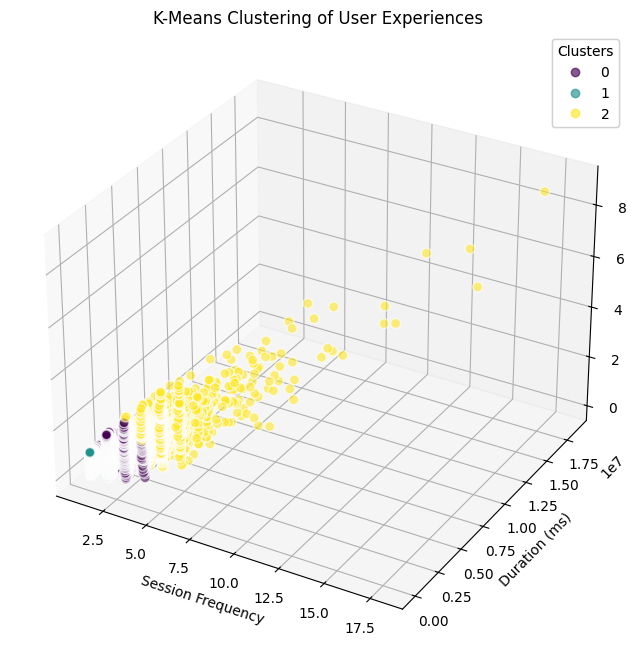

In [24]:
"""# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. """

# Select the engagement metrics for clustering
engagement_metrics = [
    'Total Data Usage',
    'Dur. (ms)',
    'session_frequency',
]

# Drop rows with missing values in the selected columns
df_cluster = merged_df[engagement_metrics].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using a rearranged 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_cluster['session_frequency'],
    df_cluster['Dur. (ms)'],
    df_cluster['Total Data Usage'],
    c=df_cluster['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='w'
)

ax.set_xlabel('Session Frequency')
ax.set_ylabel('Duration (ms)')
ax.set_zlabel('Total Data Usage')
ax.set_title('K-Means Clustering of User Experiences')

legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()

